In [2]:
#importing libraries and reading in file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#general sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#Pipeline
from sklearn.pipeline import make_pipeline


# Files
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
from scipy.io import arff



# Load the data and EDA

In [4]:
files = ['data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff']


df = pd.DataFrame(arff.loadarff(files[0])[0])

for f in files[1:]:
    data_temp = arff.loadarff(f)
    df_temp = pd.DataFrame(data_temp[0])
    print(df_temp.shape)
    df = df.merge(df_temp,how='outer') 

(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [5]:
print(df.shape)

df.head()

(43405, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


# Evaluate and transform to binary 0 0r 1 the target

In [6]:
df["class"].unique


<bound method Series.unique of 0        b'0'
1        b'0'
2        b'0'
3        b'0'
4        b'0'
         ... 
43400    b'1'
43401    b'1'
43402    b'1'
43403    b'1'
43404    b'1'
Name: class, Length: 43405, dtype: object>

In [7]:
df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

(array([41314.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2091.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

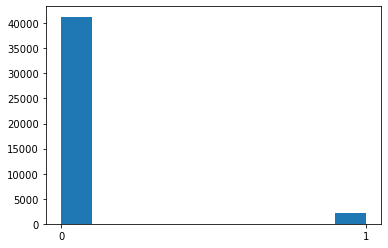

In [19]:
plt.hist(df['class'])

In [8]:
classes = []

for index, row in df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
df['class'] = df['class'].map(class_dict)

df['class'].unique()

array(['0', '1'], dtype=object)

In [9]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Explore the differents columns of the data with pandas profiling

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 242.43it/s]


In [ ]:
# Variable 21, 24 missing value
# variable 27 missing value
# variable 37 missing value
# variable 44, 45 missing value
# variable 60 missing value

# Most of the variables are skew
# some has 0 but no sure what that mean

(array([3.7541e+04, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1325. ,  1798.2,  4921.4,  8044.6, 11167.8, 14291. , 17414.2,
        20537.4, 23660.6, 26783.8, 29907. ]),
 <BarContainer object of 10 artists>)

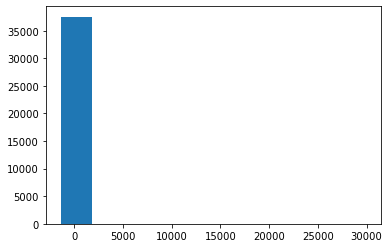

In [11]:
plt.hist(df["Attr21"])

(array([1.0000e+00, 2.0000e+00, 5.0000e+00, 4.2455e+04, 1.0000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-463.89 , -334.335, -204.78 ,  -75.225,   54.33 ,  183.885,
         313.44 ,  442.995,  572.55 ,  702.105,  831.66 ]),
 <BarContainer object of 10 artists>)

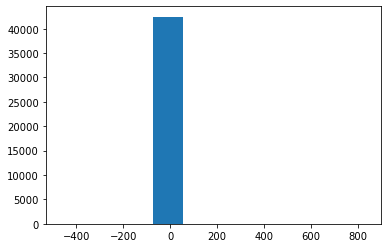

In [12]:
plt.hist(df["Attr24"])

(array([1.0000e+00, 2.0000e+00, 5.0000e+00, 4.2455e+04, 1.0000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-463.89 , -334.335, -204.78 ,  -75.225,   54.33 ,  183.885,
         313.44 ,  442.995,  572.55 ,  702.105,  831.66 ]),
 <BarContainer object of 10 artists>)

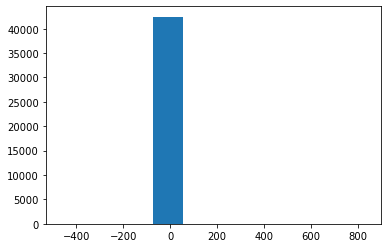

In [13]:
plt.hist(df["Attr24"])

(array([4.0597e+04, 2.9000e+01, 7.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-259010.,  187771.,  634552., 1081333., 1528114., 1974895.,
        2421676., 2868457., 3315238., 3762019., 4208800.]),
 <BarContainer object of 10 artists>)

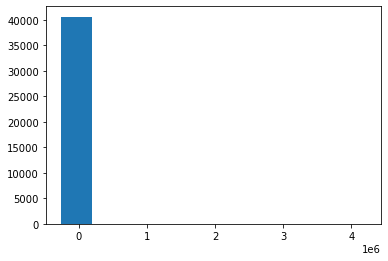

In [14]:
plt.hist(df["Attr27"])

(array([2.4411e+04, 5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -525.52 ,  39419.032,  79363.584, 119308.136, 159252.688,
        199197.24 , 239141.792, 279086.344, 319030.896, 358975.448,
        398920.   ]),
 <BarContainer object of 10 artists>)

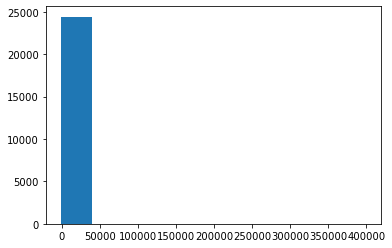

In [15]:
plt.hist(df["Attr37"])

(array([4.3276e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -115870.,  2154117.,  4424104.,  6694091.,  8964078., 11234065.,
        13504052., 15774039., 18044026., 20314013., 22584000.]),
 <BarContainer object of 10 artists>)

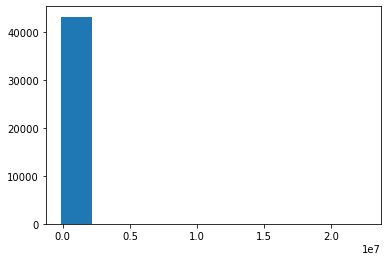

In [16]:
plt.hist(df["Attr44"])

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 4.1251e+04,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-256230., -194004., -131778.,  -69552.,   -7326.,   54900.,
         117126.,  179352.,  241578.,  303804.,  366030.]),
 <BarContainer object of 10 artists>)

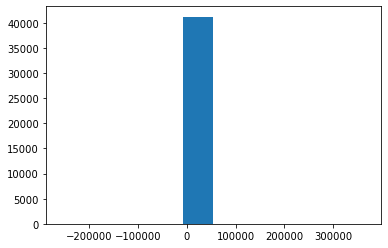

In [17]:
plt.hist(df["Attr45"])

(array([4.1247e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.24400000e+01,  4.81858804e+05,  9.63730048e+05,  1.44560129e+06,
         1.92747254e+06,  2.40934378e+06,  2.89121502e+06,  3.37308627e+06,
         3.85495751e+06,  4.33682876e+06,  4.81870000e+06]),
 <BarContainer object of 10 artists>)

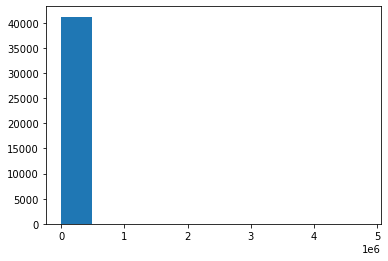

In [18]:
plt.hist(df["Attr60"])